# ESERICIZI 0

## esercizio 0.1 numpy.array([2,'c'], dtype=object) per tipi misti & ricordati stringa.replace('da_sostituire','sostituzione')
## esercizio 0.4 ed esercizio 0.5 crei dict {} vuoto condizione (elemento in dict) da true o false

In [80]:
#0.1
import numpy as np
ls=np.array([i for i in range(1,101)] , dtype=object)
res=ls.copy()
res[ ls%3 == 0 ] = "Mickey"
res[ ls%5 == 0 ] = "Mouse"
res[ ls%15 == 0 ] = "MickeyMouse"
print(res)
#res = [ str(i).replace("Mickey","Donald") for i in res]
res[ res=="Mickey" ]="Donald"
res[ res=="Mouse" ]="Duck"
res2=tuple(res)
print(res2)

[1 2 'Mickey' 4 'Mouse' 'Mickey' 7 8 'Mickey' 'Mouse' 11 'Mickey' 13 14
 'MickeyMouse' 16 17 'Mickey' 19 'Mouse' 'Mickey' 22 23 'Mickey' 'Mouse'
 26 'Mickey' 28 29 'MickeyMouse' 31 32 'Mickey' 34 'Mouse' 'Mickey' 37 38
 'Mickey' 'Mouse' 41 'Mickey' 43 44 'MickeyMouse' 46 47 'Mickey' 49
 'Mouse' 'Mickey' 52 53 'Mickey' 'Mouse' 56 'Mickey' 58 59 'MickeyMouse'
 61 62 'Mickey' 64 'Mouse' 'Mickey' 67 68 'Mickey' 'Mouse' 71 'Mickey' 73
 74 'MickeyMouse' 76 77 'Mickey' 79 'Mouse' 'Mickey' 82 83 'Mickey'
 'Mouse' 86 'Mickey' 88 89 'MickeyMouse' 91 92 'Mickey' 94 'Mouse'
 'Mickey' 97 98 'Mickey' 'Mouse']
(1, 2, 'Donald', 4, 'Duck', 'Donald', 7, 8, 'Donald', 'Duck', 11, 'Donald', 13, 14, 'MickeyMouse', 16, 17, 'Donald', 19, 'Duck', 'Donald', 22, 23, 'Donald', 'Duck', 26, 'Donald', 28, 29, 'MickeyMouse', 31, 32, 'Donald', 34, 'Duck', 'Donald', 37, 38, 'Donald', 'Duck', 41, 'Donald', 43, 44, 'MickeyMouse', 46, 47, 'Donald', 49, 'Duck', 'Donald', 52, 53, 'Donald', 'Duck', 56, 'Donald', 58, 59, 'Mic

In [6]:
#0.2
'''
The swap function
Write a function that swap the values of two input variables x and y (whatever the type). Try to do that also without a temporary variable
'''
def swap(a,b):
    temp=b
    b=a
    a=temp
    return a,b
def swap_no(a,b):
    #a,b=b,a
    return b,a
x=10
y=11
print(f"swap {x} and {y}")
x,y=swap(x,y)
#x,y=swap_no(x,y)
print(f"into {x} and {y}")

swap 10 and 11
into 11 and 10


In [8]:
#0.3
from math import sqrt
def distance(u,v):
    x1,y1=u
    x2,y2=v
    X=abs(x1-x2)
    Y=abs(y1-y2)
    return sqrt( X*X + Y*Y )
u=(3,0)
v=(0,4)
print(distance(u,v))    

5.0


In [20]:
#0.4
s="Write a program that prints the numbers from 1 to 100. \
But for multiples of three print Mickey instead of the number and for the multiples of five print Mouse. \
For numbers which are multiples of both three and five print MickeyMouse"
s=s.lower()
data={} #an empty dictionary to fill with 'char':occurrences
for i in list(s):
    if i in data:
        data[i]+=1
    else:
        data[i]=1
for char in sorted(data): print( f"char {char} appears {data[char]} times")
help(sorted)

char   appears 41 times
char . appears 2 times
char 0 appears 2 times
char 1 appears 2 times
char a appears 7 times
char b appears 5 times
char c appears 3 times
char d appears 3 times
char e appears 22 times
char f appears 10 times
char g appears 1 times
char h appears 9 times
char i appears 14 times
char k appears 2 times
char l appears 6 times
char m appears 12 times
char n appears 10 times
char o appears 13 times
char p appears 8 times
char r appears 17 times
char s appears 9 times
char t appears 19 times
char u appears 9 times
char v appears 2 times
char w appears 2 times
char y appears 2 times
Help on built-in function sorted in module builtins:

sorted(iterable, /, *, key=None, reverse=False)
    Return a new list containing all items from the iterable in ascending order.

    A custom key function can be supplied to customize the sort order, and the
    reverse flag can be set to request the result in descending order.



In [29]:
#0.5
l = [36, 45, 58, 3, 74, 96, 64, 45, 31, 10, 24, 19, 33, 86, 99, 18, 63, 70, 85,
 85, 63, 47, 56, 42, 70, 84, 88, 55, 20, 54, 8, 56, 51, 79, 81, 57, 37, 91,
 1, 84, 84, 36, 66, 9, 89, 50, 42, 91, 50, 95, 90, 98, 39, 16, 82, 31, 92, 41,
 45, 30, 66, 70, 34, 85, 94, 5, 3, 36, 72, 91, 84, 34, 87, 75, 53, 51, 20, 89, 51, 20]
l.sort()
data={}
for i in l:
    if i in data: data[i]+=1
    else: data[i]=1
print(data)
numeri_singoli=[j for j in data if data[j]==1]
print(numeri_singoli)

{1: 1, 3: 2, 5: 1, 8: 1, 9: 1, 10: 1, 16: 1, 18: 1, 19: 1, 20: 3, 24: 1, 30: 1, 31: 2, 33: 1, 34: 2, 36: 3, 37: 1, 39: 1, 41: 1, 42: 2, 45: 3, 47: 1, 50: 2, 51: 3, 53: 1, 54: 1, 55: 1, 56: 2, 57: 1, 58: 1, 63: 2, 64: 1, 66: 2, 70: 3, 72: 1, 74: 1, 75: 1, 79: 1, 81: 1, 82: 1, 84: 4, 85: 3, 86: 1, 87: 1, 88: 1, 89: 2, 90: 1, 91: 3, 92: 1, 94: 1, 95: 1, 96: 1, 98: 1, 99: 1}
[1, 5, 8, 9, 10, 16, 18, 19, 24, 30, 33, 37, 39, 41, 47, 53, 54, 55, 57, 58, 64, 72, 74, 75, 79, 81, 82, 86, 87, 88, 90, 92, 94, 95, 96, 98, 99]


In [30]:
#0.6
def square(a): return a**2
def cube(a): return a**3
def SuperPower(a): return cube(square(a))
print(SuperPower(5))

15625


In [32]:
#0.7
a=[]
for i in range(0,11): a.append(i**3)
b=[x**3 for x in range(0,11)]
print(a,b)

[0, 1, 8, 27, 64, 125, 216, 343, 512, 729, 1000] [0, 1, 8, 27, 64, 125, 216, 343, 512, 729, 1000]


In [33]:
#0.8
res = [ (a,b,c) for a in range(0,101) for b in range(0,101) for c in range(0,101) if ( a*a+b*b==c*c and b > a and c>b) ]
print(res)

[(3, 4, 5), (5, 12, 13), (6, 8, 10), (7, 24, 25), (8, 15, 17), (9, 12, 15), (9, 40, 41), (10, 24, 26), (11, 60, 61), (12, 16, 20), (12, 35, 37), (13, 84, 85), (14, 48, 50), (15, 20, 25), (15, 36, 39), (16, 30, 34), (16, 63, 65), (18, 24, 30), (18, 80, 82), (20, 21, 29), (20, 48, 52), (21, 28, 35), (21, 72, 75), (24, 32, 40), (24, 45, 51), (24, 70, 74), (25, 60, 65), (27, 36, 45), (28, 45, 53), (28, 96, 100), (30, 40, 50), (30, 72, 78), (32, 60, 68), (33, 44, 55), (33, 56, 65), (35, 84, 91), (36, 48, 60), (36, 77, 85), (39, 52, 65), (39, 80, 89), (40, 42, 58), (40, 75, 85), (42, 56, 70), (45, 60, 75), (48, 55, 73), (48, 64, 80), (51, 68, 85), (54, 72, 90), (57, 76, 95), (60, 63, 87), (60, 80, 100), (65, 72, 97)]


In [39]:
#0.9
import numpy as np
def norm(u):
    sum=0
    for i in u: sum+=abs(i)
    return tuple(np.array(u)/sum)
print( norm( (-2,3,5) ) )    

(-0.2, 0.3, 0.5)


# ESERCIZI 1

## esercizio 1.3 con il decorator @hello per funzioni che prendono variabili!!!
## esercizio 1.6 da mettere self.is_hungry=False IMPORTANTE self. perché è una variabile della singola istance

In [62]:
#1.0
from ex1_0 import cube_plus_one
print(cube_plus_one(-3))

-26


In [66]:
#1.1
#----------queste come list comprehension-----------
# 1
ans = []
for i in range(3):
    for j in range(4):
        ans.append((i, j))
print(ans)
# 2
ans = map(lambda x: x*x, filter(lambda x: x%2 == 0, range(5)))
print (list(ans))
#---------------------------------------------------

print( [(i,j) for i in range(3) for j in range(4) ] )
print( [x*x for x in range(5) if x%2 == 0] )

[(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3)]
[0, 4, 16]
[(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3)]
[0, 4, 16]


In [71]:
#1.2
# Convert the following function into a pure function with no global variables or side effects
x = 5
def f(alist):
    for i in range(x):
         alist.append(i)
    return alist

alist = [1,2,3]
ans = f(alist)
print (ans)
print (alist) # alist has been changed!
#---------------------------------------------------

def f_giusta(l,x):
    res=l.copy()
    for i in range(x):
         res.append(i)
    return res
y = [1,2,3]
ans = f_giusta(y,5)
print (ans)
print (y)
    

[1, 2, 3, 0, 1, 2, 3, 4]
[1, 2, 3, 0, 1, 2, 3, 4]
[1, 2, 3, 0, 1, 2, 3, 4]
[1, 2, 3]


In [83]:
#1.3
'''
Write a decorator hello that makes every wrapped function print “Hello!”, i.e. something like:
@hello
def square(x):
    return x*x
'''
def hello(f,*arg):
    def wrapper(*arg):
        print("hello!")
        print(*arg)
        return f(*arg) #anche nel wrapper il return sennò la funzione non spara fuori nulla
    return wrapper #devo fare così mettendo il return perché è quello che viene eseguito quando chiamo la funzione hello

@hello #sarebbe come fare square=hello(square)
def square(x,y):
    return x*x

square(5,4)

hello!
5 4


25

In [99]:
#1.3 DOVE CAPISCI MEGLIO COSA SUCCEDE CON ARG
def hello(funz,*arg):
    def wrapper(*arg):
        print("hello")
        print(*arg[0:2])
        print(type(arg))
        print(list(arg))
        return funz(*arg)
    return wrapper

@hello
def cube(x,y,z):
    print(y,z)
    return x**3

cube(4,-1,"yolo")

hello
4 -1
<class 'tuple'>
[4, -1, 'yolo']
-1 yolo


64

In [124]:
#1.4
def fact_recursion(n):
    if n==0: return 1
    else: return n*fact_recursion(n-1)

def fact1(n):
    if n==0: return 1
    else:
        res=1
        for i in range(1,n+1): res=res*i
        return res

print(fact_recursion(4))
print(fact1(4))   

24
24


In [35]:
#1.5
'''
5. Use HOFs (zip in particular) to compute the weight of a circle, a disk and a sphere, assuming different radii and different densities:

densities = {"Al":[0.5,1,2],"Fe":[3,4,5],"Pb": [15,20,30]}
radii = [1,2,3]

where the entries of the dictionary's values are the linear, superficial and volumetric densities of the materials respectively.

In particular define a list of three lambda functions using a comprehension that computes the circumference, the area and the volume for a given radius.
'''
densities = {"Al":[0.5,1,2],"Fe":[3,4,5],"Pb": [15,20,30]}
radii = [1,2,3]

from math import pi
funz = [ lambda r,d: r*2*pi*d, lambda r,d: r*r*pi*d, lambda r,d: 4.*pi/3*d*(r**3)]
for el in densities:
    for r in radii:
        ls=[ f(r,d) for f,d in zip(funz,densities[el]) ]
        print(f"For element {el} and radius {r} circumference, area and volume are: {ls}")
    print("\n")

For element Al and radius 1 circumference, area and volume are: [3.141592653589793, 3.141592653589793, 8.377580409572781]
For element Al and radius 2 circumference, area and volume are: [6.283185307179586, 12.566370614359172, 67.02064327658225]
For element Al and radius 3 circumference, area and volume are: [9.42477796076938, 28.274333882308138, 226.19467105846508]


For element Fe and radius 1 circumference, area and volume are: [18.84955592153876, 12.566370614359172, 20.94395102393195]
For element Fe and radius 2 circumference, area and volume are: [37.69911184307752, 50.26548245743669, 167.5516081914556]
For element Fe and radius 3 circumference, area and volume are: [56.548667764616276, 113.09733552923255, 565.4866776461627]


For element Pb and radius 1 circumference, area and volume are: [94.24777960769379, 62.83185307179586, 125.66370614359171]
For element Pb and radius 2 circumference, area and volume are: [188.49555921538757, 251.32741228718345, 1005.3096491487337]
For element

In [53]:
#1.6
'''
6. Edit the class defintion to add an instance attribute of is_hungry = True to the Dog class.
Then add a method called eat() which changes the value of is_hungry to False when called.
Figure out the best way to feed each dog and then output “My dogs are hungry.” if all are hungry or
“My dogs are not hungry.” if all are not hungry. The final output should look like this:

I have 3 dogs.  Tom is 6.  Fletcher is 7.  Larry is 9.  And they're all mammals, of course.  My dogs are not hungry. 
'''
# Parent class
class Dog:

    # Class attribute
    species = 'mammal'
    is_hungry = True

    # Initializer / Instance attributes
    def __init__(self, name, age):
        self.name = name
        self.age = age
        
    #new method
    def eat(self):
        self.is_hungry=False
    
    # instance method
    def description(self):
        return "{} is {} years old".format(self.name, self.age)

    # instance method
    def speak(self, sound):
        return "{} says {}".format(self.name, sound)

# Child class (inherits from Dog class)
class RussellTerrier(Dog):
    def run(self, speed):
        return "{} runs {}".format(self.name, speed)

# Child class (inherits from Dog class)
class Bulldog(Dog):
    def run(self, speed):
        return "{} runs {}".format(self.name, speed)

data=[RussellTerrier("Tom",6),Bulldog("Fletcher",7),RussellTerrier("Larry",9)]

print(f"I have {len(data)} dogs")
are_mammal=True
all_eat=True
all_not_eat=True
for i in data:
    i.eat()
    print(i.is_hungry)
    if i.species != "mammal": are_mammal=False
    all_eat = all_eat and (not i.is_hungry)
    all_not_eat = all_not_eat and (i.is_hungry)
if are_mammal : print("And they're all mammals, of course")
if all_eat: print("My dogs are not hungry.")
if all_not_eat: print("My dogs are hungry.")

I have 3 dogs
False
False
False
And they're all mammals, of course
My dogs are not hungry.


# ESERCIZI 2

## 2.2 ricordati caso NaN e inf
## 2.3 ricordati float("inf")
## 2.6 ricordati plt.xscale('log') e anche per yscale

In [51]:
#2.1
#QUESTO PROGRAMMA E' ANCORA PIU' GENERALE PUO' FARE LA CONVERSIONE DI QUALSIASI BASE IN QUALSIASI BASE PURCHE' <= BASE 16

#di default prendo e mi porto il numero a decimale (sia che parta da 2 o 16, oppure che sia da in 10)
#poi da 10 mi sposto alla base finale richiesta

#10 is treated as a number
#2, 16 are treated as string

a = list('0123456789ABCDEF')
dict1 = {x:i for i,x in enumerate(a)} # useful for 2 / 16 ----> 10
dict2 = {i:x for i,x in enumerate(a)} # useful for 10 ----> 2 / 16
def to_decimal(value,base_from): # output in decimal  2--->10 or 16--->10
    value = str(value).upper()
    data = list(value)
    data = data[::-1]
    sum = 0
    for i,x in enumerate(data):
        if dict1[x] >= base_from: print('INPUT ERROR, BASE NOT CORRECT')
        sum += dict1[x] * base_from ** i    
    return sum

def from_decimal(value,base_to): # 10--->2 or 10--->16, output is in string
    if value == 0:
        return '0'
    else:
        res = ''
        while(value>0):
            res = dict2[ value % base_to ] + res 
            value = value // base_to                   
        return res

def convert(value,base_from,base_to):
    if base_from != 10:
        value=to_decimal(value,base_from) #the value is convert to decimal
    if base_to == 10:
        return value
    else: 
        return from_decimal(value,base_to) #before the value is always converted in base 10

#origin='101010110010'
#origin=2738
origin='AB2'
base_origin=16
base_arrival=16
#y = to_decimal(origin,base_origin)
#print( y )
#print( from_decimal( y,base_arrival ) ) 
print(convert(origin,base_origin,base_arrival))

AB2


In [39]:
#2.2
c="11000001111110010101000111100111" #"0 10000011 11110010101000111100111"
b="11000001000010010001000000000000"
def convert (a):
    #print(len(a))
    sign=1-2*int(a[0])
    exp=int(a[1:9],2)
    mantissa="1"+a[9:] #add the 1.
    value_mantissa=0
    for e,x in enumerate(mantissa): value_mantissa = value_mantissa + int(x) *2 ** (-1*e)
    if exp==255 and value_mantissa>=1:
        if value_mantissa>1: return "NaN" # case in which te mantissa as at least one value != 0, since its value is 1.matissa
        else: return str(sign)+"*INF" #case value_mantissa == 1
    else:
        value=sign*value_mantissa*2**(exp-127)
        return value

print(f"{b} in binary is equal to {convert(b)}")

11000001000010010001000000000000 in binary is equal to -8.56640625


In [50]:
#2.3
#define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits
a=1.
b=1.
while( a != 0 ):
    under=a
    a=a/2.
    #print(a)
print(f"underflow limit of this pc is up to {under}")

while( b != float("inf") ):
    over=b
    b=b*2.
    #print(b)
print(f"overflow limit of this pc is up to {over}") 


underflow limit of this pc is up to 5e-324
overflow limit of this pc is up to 8.98846567431158e+307


In [59]:
#2.4
a=1.
epsilon=1.
while ( a!=(a+epsilon) ):
    precision=epsilon
    epsilon=epsilon/2.
    #print(precision,epsilon)
print(f"precision by adding is up untile {precision}")
    

precision by adding is up untile 2.220446049250313e-16


In [2]:
#2.5
from math import sqrt
a,b,c = 0.001,1000.,0.001

#soluzioni sono -0.0000010000 and -1000000.00 , ossia -(1e-6) e -(1e6)
#ax^2+bx+c = 0, ossia (1e-3)x^2 + (1e3)x + (1e-3) = 0

def f(x,a=a,b=b,c=c): 
    return a*x*x+b*x+c
def sqrt_delta(a=a,b=b,c=c):
    delta=b*b-4*a*c
    if delta>= 0. :
        return(sqrt(delta))
    else:
        print('MATH ERROR, negative square root')
def sol1(a=a,b=b,c=c): 
    return [(-b+sqrt_delta())/(2*a) , (-b-sqrt_delta())/(2*a)]
def sol2(a=a,b=b,c=c): 
    return [(4*a*c)/(2*a*(-b-sqrt_delta())) , (4*a*c)/(2*a*(-b+sqrt_delta()))]

def best_sol(a=a,b=b,c=c):
    sol=[]
    for i,j in zip( sol1(),sol2() ):
        if abs(f(i)) <= abs(f(j)): sol.append(i)
        else: sol.append(j)
    return sol

x1,x2=sol1()
print(f'Solution of {a}x*x+{b}x+{c}=0 using standard formula are: \n {x1:.10f} and {x2:.2f} \n')
x1,x2=sol2()
print(f'Solution of {a}x*x+{b}x+{c}=0 using unrationalized formula are: \n {x1:.10f} and {x2:.2f} \n')

print('The computational issues are due to the fact that sqrt(delta) in nearly 1000, \
so equal to b so in the formula it happens that there is a division between two small numbers anche the computer doesn\'t handle it properly.\n')

x1,x2=best_sol()
print(f'The best computational solution of {a}x*x+{b}x+{c}=0 are: \n {x1:.10f} and {x2:.2f} \n')

Solution of 0.001x*x+1000.0x+0.001=0 using standard formula are: 
 -0.0000010000 and -1000000.00 

Solution of 0.001x*x+1000.0x+0.001=0 using unrationalized formula are: 
 -0.0000010000 and -1000010.58 

The computational issues are due to the fact that sqrt(delta) in nearly 1000, so equal to b so in the formula it happens that there is a division between two small numbers anche the computer doesn't handle it properly.

The best computational solution of 0.001x*x+1000.0x+0.001=0 are: 
 -0.0000010000 and -1000000.00 



The derivative using the limit definition with delta 0.01 is equal to:
1.01000000

The derivative using the limit definition with delta 0.0001 is equal to:
1.00010000

The derivative using the limit definition with delta 1e-06 is equal to:
1.00000100

The derivative using the limit definition with delta 1e-08 is equal to:
1.00000000

The derivative using the limit definition with delta 1e-10 is equal to:
1.00000008

The derivative using the limit definition with delta 1e-12 is equal to:
1.00008890

The derivative using the limit definition with delta 1e-14 is equal to:
0.99920072

While the derivative analitic value is 1

Not same results due to computational factors, not an easy calculation cause it arises from a divsion of two small numbers


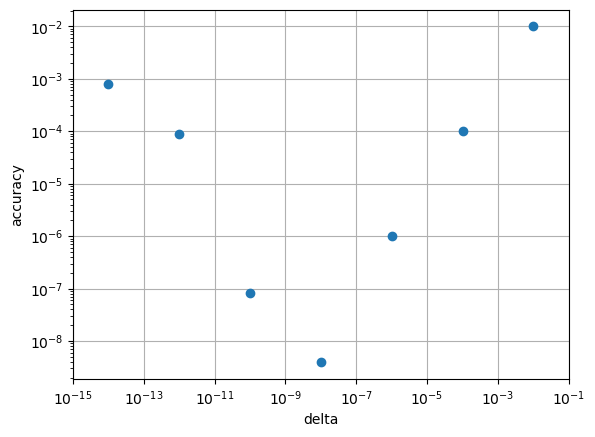

In [1]:
#2.6
import matplotlib.pyplot as plt
import numpy as np
def f(x=1): return x*(x-1)
def f_prime(x=1): return 2*x-1
def f_der_lim(x,d): return ( f(x+d) - f(x) ) / d
delta = [ 10**(-2*i) for i in range(1,8) ]
from_der = np.array( [ f_der_lim(1,d) for d in delta ] )
for d,ris in zip(delta,from_der): print(f'The derivative using the limit definition with delta {d} is equal to:\n{ris:.8f}\n')
print(f'While the derivative analitic value is {f_prime(x=1)}\n')
print('Not same results due to computational factors, not an easy calculation cause it arises from a divsion of two small numbers')
plt.plot(delta,abs(from_der-1),'o')
plt.ylabel('accuracy')
plt.xlabel('delta')
plt.xscale('log')
plt.yscale('log')
plt.xlim(10**(-15),10**(-1))
plt.grid(True)
plt.show()

In [5]:
#2.7
from math import pi
from math import sqrt
import numpy as np
import time
#N=100
def f(x): 
    return sqrt(1-x*x)
def integr(N):
    bins = np.linspace(-1,1,N+1) #using this trick to center the xi in the bins, see below
    a = np.array( [ f(x) for x in (bins[1:]+bins[:-1])/2 ] )
    return a.sum()*2/N
def time_integr(N):
    start=time.time()
    integr(N)
    end=time.time()
    return end-start
print(f"The integral comutationally with Riemann methon using N={100} is: {integr(100)}")
print(f'The analitical result of the integral is {pi/2}')
def max_iteraz(seconds):
    N=100
    while(time_integr(N)<seconds):
        N = N * 2
    return int(N / 2) #sennò il programma ti da errore che lo interpreta come un float e non funzina più np.linspace(a,b,N)
N_1_sec = max_iteraz(1)
N_20_sec = max_iteraz(20)
print(f'Number of iterations are {N_1_sec} to mantain Riemann method for integral below 1 second with result {integr(N_1_sec)}')
print(f'Number of iterations are {N_20_sec} to mantain Riemann method for integral below 20 second with result {integr(N_20_sec)}')

The integral comutationally with Riemann methon using N=100 is: 1.571282776229796
The analitical result of the integral is 1.5707963267948966
Number of iterations are 409600 to mantain Riemann method for integral below 1 second with result 1.5707963286530642
Number of iterations are 13107200 to mantain Riemann method for integral below 20 second with result 1.57079632680516


# ESERCIZIO 3

## BASH BASTARDO, DA RIGUARDA TUTTO PER BENE

In [ ]:
# !/bin/bash

mkdir -p DA_CANCELLARE
cd DA_CANCELLARE
name="LCP_22-23_students.csv"

if [ ! -f $name ]
	then
	wget -O $name https://www.dropbox.com/scl/fi/bxv17nrbrl83vw6qrkiu9/LCP_22-23_students.csv?rlkey=47fakvatrtif3q3qw4q97p5b7&e=1
fi

#grep "PoD" $name > "Pod.csv"
#grep "Physics" $name > "Physics.csv"

max_count=0
max_letter=''
for x in {A..Z}
do
	count=0
	count=$(tail -n +2 $name | tr '[:lower:]' '[:upper:]' |grep -c "^$x")
	if [ $count -gt $max_count ]
	then
		max_count=$count
		max_letter=$x
	fi
	echo "The surnames that start by letter $x are $count"| tr '[:lower:]' '[:upper:]'
done

echo ''
echo "The letter with the maximum occurrences is $max_letter with $max_count times"

for ((i=0;i<18;i++))
do
	tail -n +2 $name | awk -v div=$i '{if(NR%18==div) print $0 }' > "file_$i.csv"
done

In [ ]:
# !/bin/bash

grep -v "^#" "data.csv" | sed "s/,//g" > "DACANCELLARE.TXT"

even=$(awk 'BEGIN{count=0} {for(i=1;i<=NF;i++) {if($i%2==0) count++}} END{print count} ' "DACANCELLARE.TXT")
echo "There are $even even numbers"

threshold=$(echo "100*sqrt(3)/2" | bc -l)
small=0
big=0
while read x y z x1 y1 z1
do
	a=$( echo "sqrt($x*$x + $y*$y + $z*$z)" | bc -l )
	if(( $( echo "$a > $threshold" | bc -l ) ))
	then
		((big++))
	else
		((small++))
	fi
done < "DACANCELLARE.TXT"

echo "I numeri grandi sono $big"
echo "I numeri piccoli sono $small"

read -p "Inserisci il numeri i: " i
echo "Hai scelto $i LOL"
for((j=1;j<=i;j++))
do
	awk -v div=$j '{ for(k=1;k<=NF;k++) { $k=sprintf("%.3f",$k/div) } print $0}' "DACANCELLARE.TXT" > "da_cancell_$j.txt"
done

# ESERCIZI 4

## esercizio 4.2 e altri array[ : , np.newaxis] (così ho il vettore trasposto diciamo)
## esercizio 4.3 vedi guida help(np.any), anche np.full
## esercizio 4.4 plt.axvline(x) per plottare le linee verticali, occhio x non array ma un int, devi fare ciclo for da fuori
## esercizio 4.5 np.diagonal(array,offset=)
## esercizio 4.6 df.index setto le righe, df.columns setto le colonne
## esercizio 4.7 timeit.timeit(lambda: funzione, number=100) ritorna un float che è la media del tempo
## esercizio 4.7 plt.sublpot(nrow,ncol,index)
## esercizio 4.8 np.cumsum(data,axis=1)
## esercizio 4.9 np.loadtxt
## esercizio 4.9 df.corr() e df.describe()
## esercizio 4.9 np.argmax( ) per avere l'indice della posizione dove sta il valore max
## esercizio 4.9 data[:,1:] così escludo la colonna numero 0
## trick utile nparray.T per trasporre un vettore

In [43]:
#4.1
import numpy as np
m = np.arange(12).reshape((3,4))
print(m)
col = np.mean(m,axis=0)
row = np.mean(m,axis=1)
mean = m.mean()
print(col,row,mean)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[4. 5. 6. 7.] [1.5 5.5 9.5] 5.5


In [50]:
#4.2
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
print(np.outer(u,v))
print( np.array([[i*j for i in u] for j in v]) )
print(u*v[:,np.newaxis])

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  6 10 14]
 [ 4 12 20 28]
 [ 6 18 30 42]
 [ 8 24 40 56]]
[[ 2  6 10 14]
 [ 4 12 20 28]
 [ 6 18 30 42]
 [ 8 24 40 56]]


In [76]:
#4.3
import numpy.random as npr
a=npr.random(size=(10,6))
c=np.any(a,axis=1,keepdims=True,where=a<0.1)
c=c*np.full((6),True)
print(a)
#print(c)
print("\n")
a[c]=0
print(a)

[[0.64893206 0.20780442 0.57746197 0.97948705 0.25208382 0.90171345]
 [0.75653004 0.23086359 0.9210512  0.17178187 0.50448989 0.29408935]
 [0.06081267 0.66234674 0.6381715  0.05409221 0.30359826 0.18038082]
 [0.50698904 0.9326261  0.84651945 0.27798491 0.52191973 0.02212471]
 [0.73654692 0.83916432 0.6987016  0.79780855 0.34111986 0.5690756 ]
 [0.59067134 0.44489649 0.34360761 0.24938182 0.95558469 0.00492787]
 [0.94270696 0.8749944  0.37803475 0.28558301 0.06540472 0.35666673]
 [0.72883294 0.13377743 0.96629501 0.07944268 0.45163958 0.87066995]
 [0.4739831  0.38010041 0.6960402  0.77283154 0.38203281 0.60514314]
 [0.64775354 0.62132902 0.42115206 0.94263938 0.3271461  0.90298679]]


[[0.64893206 0.20780442 0.57746197 0.97948705 0.25208382 0.90171345]
 [0.75653004 0.23086359 0.9210512  0.17178187 0.50448989 0.29408935]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.73654692 0.83916432 0.69870

[[0.         0.06346652 0.12693304 0.19039955 0.25386607]
 [0.31733259 0.38079911 0.44426563 0.50773215 0.57119866]
 [0.63466518 0.6981317  0.76159822 0.82506474 0.88853126]
 [0.95199777 1.01546429 1.07893081 1.14239733 1.20586385]
 [1.26933037 1.33279688 1.3962634  1.45972992 1.52319644]
 [1.58666296 1.65012947 1.71359599 1.77706251 1.84052903]
 [1.90399555 1.96746207 2.03092858 2.0943951  2.15786162]
 [2.22132814 2.28479466 2.34826118 2.41172769 2.47519421]
 [2.53866073 2.60212725 2.66559377 2.72906028 2.7925268 ]
 [2.85599332 2.91945984 2.98292636 3.04639288 3.10985939]
 [3.17332591 3.23679243 3.30025895 3.36372547 3.42719199]
 [3.4906585  3.55412502 3.61759154 3.68105806 3.74452458]
 [3.8079911  3.87145761 3.93492413 3.99839065 4.06185717]
 [4.12532369 4.1887902  4.25225672 4.31572324 4.37918976]
 [4.44265628 4.5061228  4.56958931 4.63305583 4.69652235]
 [4.75998887 4.82345539 4.88692191 4.95038842 5.01385494]
 [5.07732146 5.14078798 5.2042545  5.26772102 5.33118753]
 [5.39465405 5

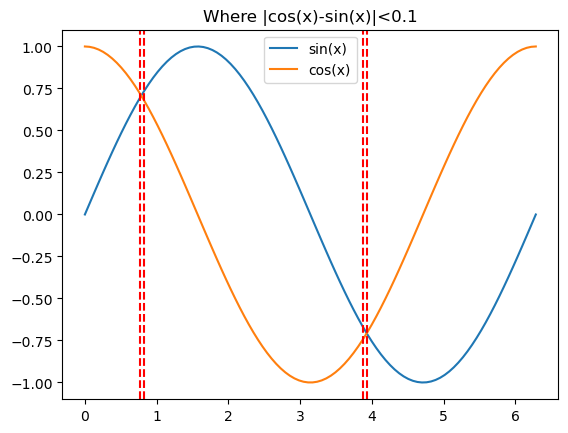

In [52]:
#4.4
'''
 Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

    Extract every 10th element using slice notation
    Reverse the array using slice notation
    Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
    Make a plot showing the sin and cos functions and indicate where they are close
'''
from math import pi
import numpy as np
import matplotlib.pyplot as plt
a=np.linspace(0,2*pi,100)
c=a.copy().reshape(20,5)
print(c)
#print(a[::10])
#print(a[::-1])
d=[ i for i in a if abs(np.sin(i)-np.cos(i))<0.1 ]
print(d)
plt.plot(a,np.sin(a),label='sin(x)')
plt.plot(a,np.cos(a),label='cos(x)')
for line in d: plt.axvline(line,linestyle='--',color='red')
plt.title('Where |cos(x)-sin(x)|<0.1')
plt.legend(loc='best')
plt.show()

In [101]:
#4.5
a=np.arange(1,11)
b=a*a[:,np.newaxis]
print(b)
print(np.trace(b))
print(np.diagonal(b[::-1]))
print(np.diagonal(b,offset=1))

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
385
[10 18 24 28 30 30 28 24 18 10]
[ 2  6 12 20 30 42 56 72 90]


In [120]:
#4.6
import numpy as np
import pandas as pd
city = ["Chicago", "Springfield", "Saint-Louis", "Tulsa", "Oklahoma City", "Amarillo", "Santa Fe", "Albuquerque", "Flagstaff", "Los Angeles"]
distance = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
distance1 = distance.copy()
distance1 = distance1[ :,  np.newaxis ]
matrix = abs( distance - distance1 )
df=pd.DataFrame(matrix)
df.index=city
df.columns=city
df

,Chicago,Springfield,Saint-Louis,Tulsa,Oklahoma City,Amarillo,Santa Fe,Albuquerque,Flagstaff,Los Angeles
Chicago,0,198,303,736,871,1175,1475,1544,1913,2448
Springfield,198,0,105,538,673,977,1277,1346,1715,2250
Saint-Louis,303,105,0,433,568,872,1172,1241,1610,2145
Tulsa,736,538,433,0,135,439,739,808,1177,1712
Oklahoma City,871,673,568,135,0,304,604,673,1042,1577
Amarillo,1175,977,872,439,304,0,300,369,738,1273
Santa Fe,1475,1277,1172,739,604,300,0,69,438,973
Albuquerque,1544,1346,1241,808,673,369,69,0,369,904
Flagstaff,1913,1715,1610,1177,1042,738,438,369,0,535
Los Angeles,2448,2250,2145,1712,1577,1273,973,904,535,0


[  2   3   5   7  11  13  17  19  23  29  31  37  41  43  47  53  59  61
  67  71  73  79  83  89  97 101 103 107 109 113 127 131 137 139 149 151
 157 163 167 173 179 181 191 193 197 199]
[  2   3   5   7  11  13  17  19  23  29  31  37  41  43  47  53  59  61
  67  71  73  79  83  89  97 101 103 107 109 113 127 131 137 139 149 151
 157 163 167 173 179 181 191 193 197 199]


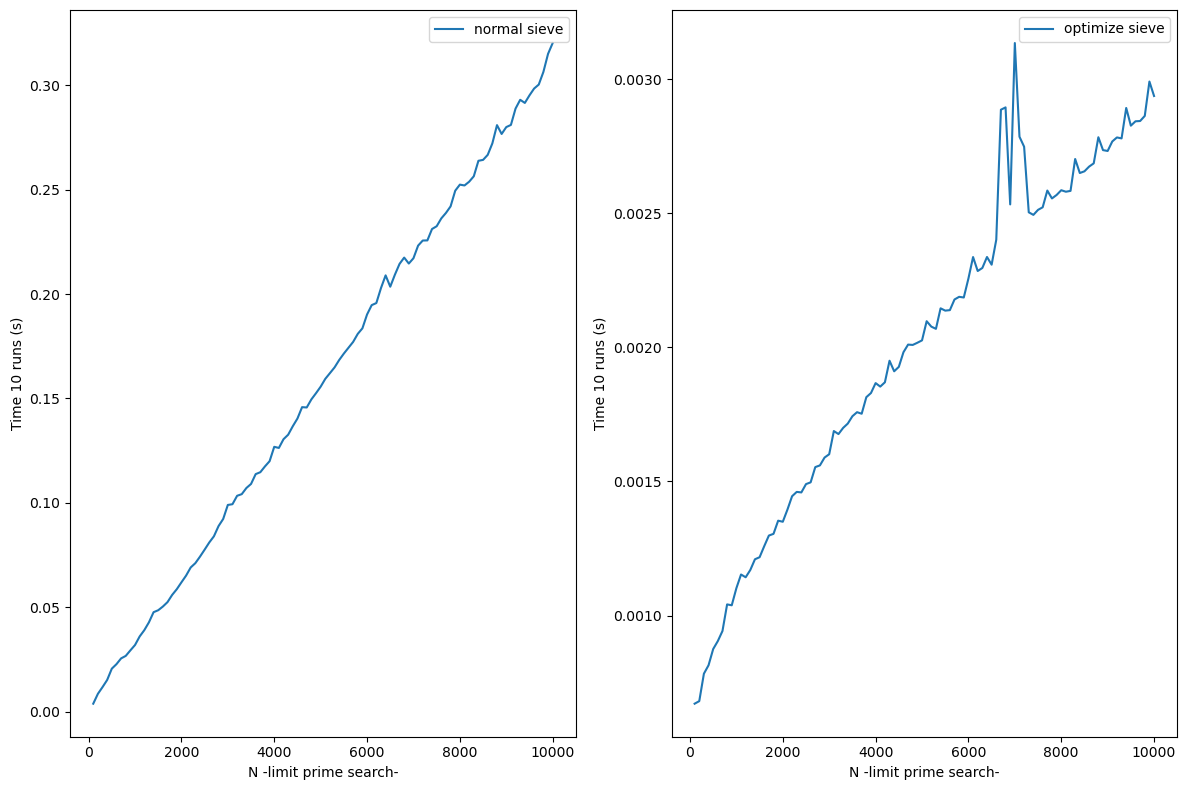

In [38]:
#4.7
import matplotlib.pyplot as plt
from math import ceil
import numpy as np
import timeit

def prime(N=99):
    x=np.arange(0,N+1)
    mask=np.full((N+1),True)
    mask[0]=mask[1]=False
    for i in range(2,N+1): mask[2*i:N+1:i]=False
    return x[mask]
    
print(prime(200))

def prime_opt(N=99):
    x=np.arange(0,N+1)
    mask=np.full((N+1),True)
    mask[0]=mask[1]=False
    mask[4::2]=False #set even = 0
    #ricordati che prima setti gli even = False e poi il CICLO E' SOLO SUI DISPARI!!!
    for i in range(3,ceil(np.sqrt(N+1)),2): mask[i*i:N+1:2*i]=False
    return x[mask]

print(prime_opt(200))

iteraz = 10 #number in timeit.timeit tenuto basso perché sennò esplodeva il pc con troppe iterazioni
N = [100*i for i in range(1,101)]
T1 = [timeit.timeit(lambda : prime(n) , number=iteraz) for n in N ]
T2 = [timeit.timeit(lambda : prime_opt(n) , number=iteraz) for n in N]

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.plot(N,T1,'-',label='normal sieve')
plt.legend()
plt.ylabel(f"Time {iteraz} runs (s)")
plt.xlabel("N -limit prime search-")

plt.subplot(1,2,2)
plt.plot(N,T2,'-',label='optimize sieve')
plt.legend()
plt.ylabel(f"Time {iteraz} runs (s)")
plt.xlabel("N -limit prime search-")
plt.tight_layout()

plt.show()

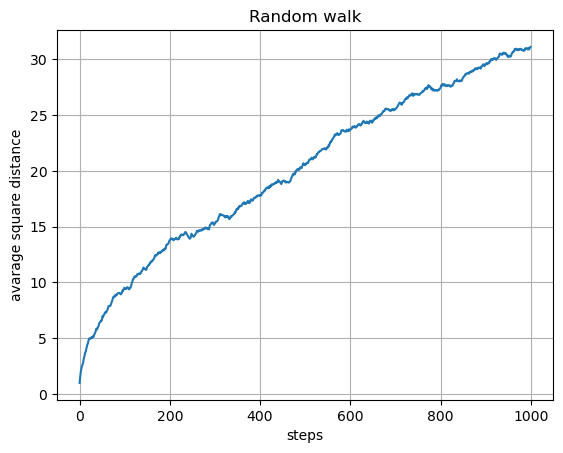

In [56]:
#4.8
import numpy.random as npr
import pandas as pd
data=1-2*npr.randint(0,2,size=(200,1000))
df=pd.DataFrame(data)
sum=abs(np.cumsum(data,axis=1))
dist=np.sqrt( np.mean(sum**2,axis=0) )
plt.plot(dist,'-')
plt.grid(True)
plt.title('Random walk')
plt.ylabel('avarage square distance')
plt.xlabel('steps')
plt.show()

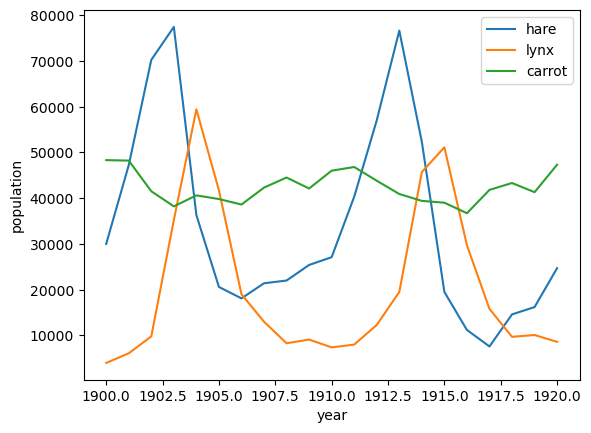

              year          hare          lynx        carrot
count    21.000000     21.000000     21.000000     21.000000
mean   1910.000000  34080.952381  20166.666667  42400.000000
std       6.204837  21413.981859  16655.999920   3404.555771
min    1900.000000   7600.000000   4000.000000  36700.000000
25%    1905.000000  19500.000000   8600.000000  39800.000000
50%    1910.000000  25400.000000  12300.000000  41800.000000
75%    1915.000000  47200.000000  29700.000000  44500.000000
max    1920.000000  77400.000000  59400.000000  48300.000000
            year      hare      lynx    carrot
year    1.000000 -0.389177 -0.025448 -0.136333
hare   -0.389177  1.000000  0.071892 -0.016604
lynx   -0.025448  0.071892  1.000000 -0.680577
carrot -0.136333 -0.016604 -0.680577  1.000000


Species with the major population for each year
      year max species
0   1900.0      carrot
1   1901.0      carrot
2   1902.0        hare
3   1903.0        hare
4   1904.0        lynx
5   1905.0        lynx
6   1

In [24]:
#4.9
#! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
#! cat populations.txt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data=np.loadtxt('populations.txt')
df=pd.DataFrame(data)
species=np.array(['year','hare','lynx','carrot'])
df.columns=species
year, hares, lynxes, carrots = data.T
'''
year=df['year']
hare=df['hare']
lynx=df['lynx']
carrot=df['carrot']
'''
for i in species:
    if i != 'year': plt.plot(year,df[i],label=i)
plt.xlabel('year')
plt.ylabel('population')
plt.legend()
plt.show()

print(df.describe())
print(df.corr())

print('\n')
print('Species with the major population for each year')
index_max=np.argmax(data[:,1:],axis=1) #skip coulum year
df_max = pd.DataFrame({'year':year,'max species':species[1+index_max]})
print(df_max)

# ESERCIZI 5

## esercizio 5.1 np.savetxt
## esercizio 5.1 with open('name,'mode') as file:   file.write(  STR(ARRAY) --sennò non scrive-- )   file.close()
## esercizio 5.3 ' '.join( lista DI STRINGHE ) --- contrario ' '.split( lista )
## esercizio 5.3 stringa.replace('prima','dopo')
## esercizio 5.5 df.read_json !!!!!!
## esercizio 5.5 df.loc[-:-] e df.iloc[-:-]
## esercizio 5.5 df.to_csv('nome.csv',index=False)
## esercizio 5.6 df.read_csv('url')
## esercizio 5.6 df.hist
## esercizio 5.8 df.to_json("eserc_5_8.csv",orient="records",indent=4)

In [34]:
#5.1
import numpy.random as npr
ls = npr.rand(100)
print(ls)
#np.savetxt('esercizio5_1.txt',ls,fmt='%.6f')
with open('eser5_1.txt','w') as file:
    file.write(str(ls))
    file.close()

[4.60703679e-01 8.59269894e-01 1.91169326e-01 3.96189213e-01
 6.97551477e-01 3.87402698e-01 8.99823608e-01 9.22880969e-01
 2.68518893e-01 1.05876028e-01 4.58105261e-01 1.09247375e-01
 8.85496511e-01 6.05127444e-01 9.73198826e-02 1.33530684e-01
 3.41743596e-01 9.97373666e-01 6.07177946e-02 8.36752329e-02
 7.59431442e-01 2.07371661e-01 2.99769124e-01 2.43450421e-01
 9.68435107e-01 9.70186287e-01 2.78460516e-01 5.89352556e-01
 6.92838517e-01 9.51514830e-01 5.18573805e-01 3.85395445e-03
 6.22462901e-01 1.89676356e-01 5.49597159e-01 7.51255064e-01
 5.69642975e-01 5.47833053e-01 5.15370474e-01 1.32457912e-01
 5.97851499e-03 1.66302331e-04 1.51235855e-01 6.76260883e-01
 2.06730422e-01 8.48624790e-01 6.85775846e-01 4.06634514e-01
 5.19252733e-01 7.23392285e-01 1.41260595e-01 6.13239492e-01
 8.22986094e-01 1.44176558e-01 6.93870325e-01 2.31988546e-01
 6.65771961e-01 6.36724573e-01 9.70961422e-02 1.55370436e-01
 7.97544919e-01 2.57002220e-01 6.70113737e-01 7.44546818e-01
 2.98759704e-01 4.617062

In [41]:
#5.2
a=npr.random(size=(5,5))
name='eser5_2.txt'
with open (name,'w') as file:
    file.write(str(a))
    file.close()
! cat ./'eser5_2.txt'

[[0.73482867 0.81350063 0.43364452 0.53862274 0.29928852]
 [0.97990182 0.61318191 0.54310676 0.57180114 0.86297263]
 [0.78080584 0.62722252 0.45676191 0.0767781  0.69106916]
 [0.67606787 0.74242591 0.58324678 0.03141589 0.0240693 ]
 [0.98759004 0.37667547 0.64358443 0.49278248 0.71823039]]

In [92]:
#5.3
data=[]
with open('eser5_2.txt','r') as file:
    for line in file:
        x=line.replace(']','').replace(' [','').replace('[[','').replace('\n','')
        ls=x.split(' ')
        ls=[float(i) for i in ls if i != '']
        data.append(ls)
    file.close()

with open('eser5_3.txt','w') as file2:
    for numeri in data:
        res=''
        for y in numeri:
            res+=str(y)
            if y != numeri[-1]: res+=','
            else: res+='\n'
        file2.write(res)
    file2.close()
! cat 'eser5_3.txt'

0.73482867,0.81350063,0.43364452,0.53862274,0.29928852
0.97990182,0.61318191,0.54310676,0.57180114,0.86297263
0.78080584,0.62722252,0.45676191,0.0767781,0.69106916
0.67606787,0.74242591,0.58324678,0.03141589,0.0240693
0.98759004,0.37667547,0.64358443,0.49278248,0.71823039


In [102]:
#5.4
with open('credit_card.dat','r') as f:
    for line in f:
        data=line[0:-4]
        res=''
        for i in range(0,len(data),6):
            res+=chr( int(data[i:i+6],2) )
        print(res)
    f.close()

7648 5673 3775 2271
3257 8247 3354 2266
2722 0001 4011 6652
0661 3063 3742 3150
0432 1608 1462 4742
5827 2027 8785 7303
5774 8528 2087 1117
8140 1210 6352 2845
5764 1133 7301 7100
6456 1737 4126 6726
1228 8631 7382 0000
7051 0160 5374 3166
0618 3587 1630 6376
1545 5454 7444 5636
6735 3116 3202 6834
7287 5011 1547 8413
7033 2607 3328 4200
2568 5244 1874 5024
1684 2253 7570 7118
0672 2576 0575 6631
6332 8353 8787 1340
1813 3361 1175 4211
2477 6450 8840 2368
5512 3505 2563 1326
3083 7882 0621 0025
4521 5148 8045 0334
7563 3654 8713 5787
8324 2664 0476 5561
0565 2504 7168 3510
5107 5507 1767 0738
2462 1821 2448 1443
2788 0638 6861 6554
5851 5873 5474 0547
0670 1004 4013 2655
5874 5506 3048 0806
2805 5401 8462 1260
5083 8406 6310 1862
1076 1445 3013 2266
8440 4804 4844 5277
4758 6141 0686 1387
7586 0675 0315 2568
2544 1258 7432 5165
3474 5023 4434 5626
1410 0270 0434 5086
7315 4446 1104 4215
0224 7742 8300 0266
0170 2700 3145 0640
2006 2437 805

In [127]:
#5.5
#5. Load the file "user_data.json", filter the data by the "CreditCardType" field equals to "American Express". Than save the data a to CSV.
import numpy as np
import pandas as pd
df = pd.read_json("user_data.json")
filtered = df[df['CreditCardType']=="American Express"]
filtered.to_csv('eser5_5.csv',index=False)
! cat 'eser5_5.csv'

ID,JobTitle,EmailAddress,FirstNameLastName,CreditCard,CreditCardType
2,Investment  Advisor,Clint_Thorpe5003@bulaffy.com,Clint Thorpe,7083-8766-0251-2345,American Express
12,Retail Trainee,Phillip_Carpenter9505@famism.biz,Phillip Carpenter,3657-0088-0820-5247,American Express
28,Project Manager,Russel_Graves1378@extex.org,Russel Graves,6718-4818-8011-6024,American Express
39,Stockbroker,Leanne_Newton1268@typill.biz,Leanne Newton,5438-0816-4166-4847,American Express
57,Budget Analyst,Tony_Giles1960@iatim.tech,Tony Giles,8130-3425-7573-7745,American Express
62,CNC Operator,Owen_Allcott5125@bauros.biz,Owen Allcott,4156-0107-7210-2630,American Express
68,Project Manager,Liam_Lynn3280@kideod.biz,Liam Lynn,7152-3247-6053-2233,American Express
74,Dentist,Regina_Woodcock5820@yahoo.com,Regina Woodcock,0208-1753-3870-8002,American Express
81,HR Specialist,Carter_Wallace9614@atink.com,Carter Wallace,4256-7201-6717-4322,American Express
92,Staffing Consultant,Maia_Stark2797@jiman.org,Maia Stark,385

Text(0, 0.5, 'occurrences')

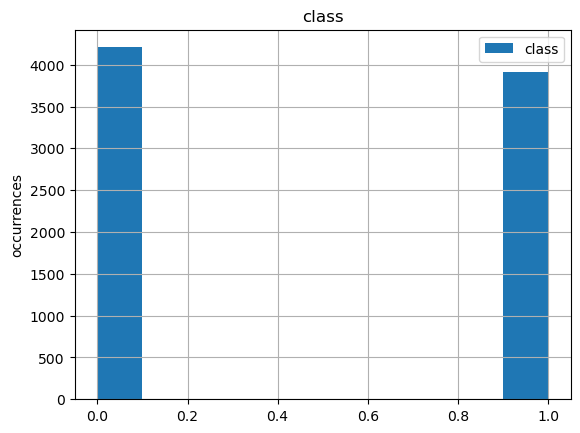

In [136]:
#5.6
import pandas as pd
#df = pd.read_csv('https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1')
#df
df.describe()
df.hist(column='class',legend=True)
plt.ylabel('occurrences')

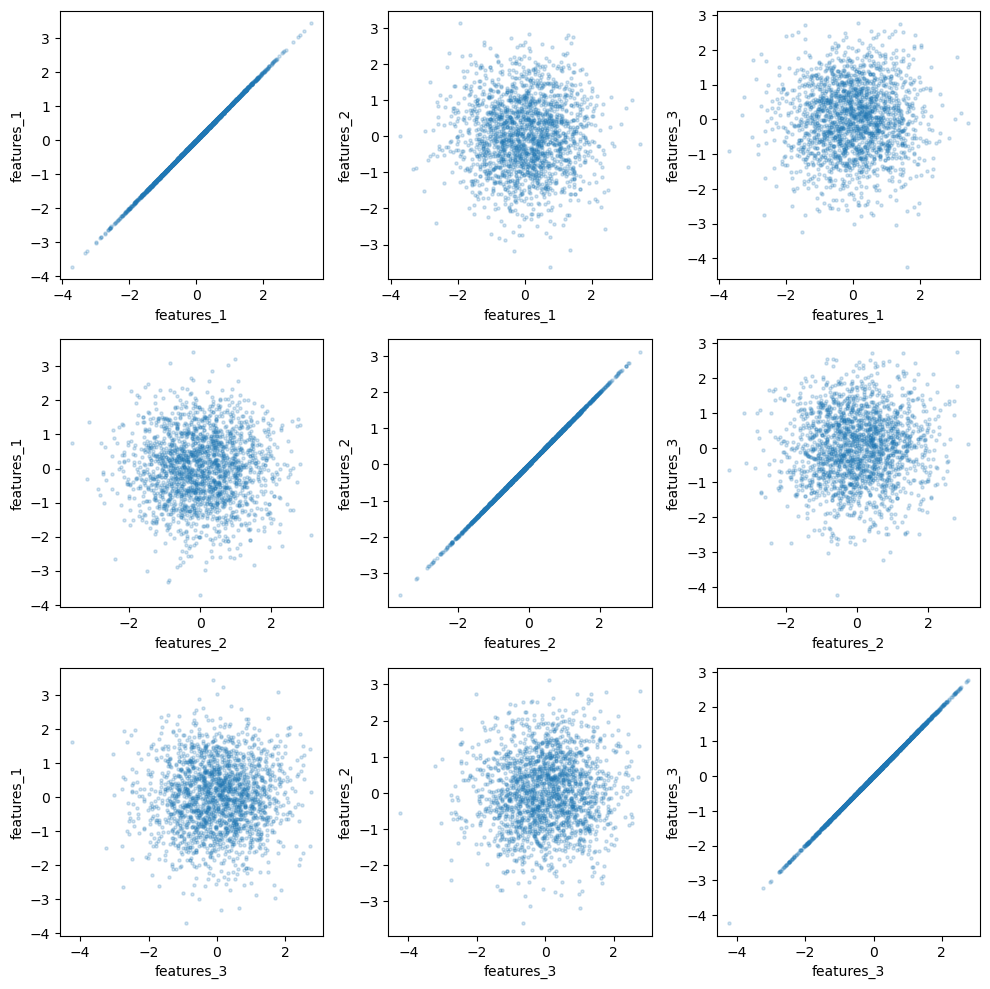

In [150]:
#5.7
import pandas as pd
import matplotlib.pyplot as plt
#df = pd.read_csv('https://www.dropbox.com/s/vkl89yce7xjdq4n/regression_generated.csv?dl=1')
df
feat = ['features_1','features_2','features_3']
fig, ax = plt.subplots(3,3,figsize=(10,10))
for i in range(0,3):
    for j in range(0,3):
        ax[i][j].scatter(df[feat[i]],df[feat[j]],alpha=0.2,s=5)
        ax[i][j].set_xlabel(feat[i])
        ax[i][j].set_ylabel(feat[j])
plt.tight_layout()
plt.show()        

In [1]:
#5.8
import pandas as pd
df = pd.read_csv('https://www.dropbox.com/s/7u3lm737ogbqsg8/mushrooms_categorized.csv?dl=1')
df.to_json("eserc_5_8.csv",orient="records",indent=4)
! head -n 100 "eserc_5_8.csv"

[
    {
        "class":1,
        "cap-shape":5,
        "cap-surface":2,
        "cap-color":4,
        "bruises":1,
        "odor":6,
        "gill-attachment":1,
        "gill-spacing":0,
        "gill-size":1,
        "gill-color":4,
        "stalk-shape":0,
        "stalk-root":3,
        "stalk-surface-above-ring":2,
        "stalk-surface-below-ring":2,
        "stalk-color-above-ring":7,
        "stalk-color-below-ring":7,
        "veil-type":0,
        "veil-color":2,
        "ring-number":1,
        "ring-type":4,
        "spore-print-color":2,
        "population":3,
        "habitat":5
    },
    {
        "class":0,
        "cap-shape":5,
        "cap-surface":2,
        "cap-color":9,
        "bruises":1,
        "odor":0,
        "gill-attachment":1,
        "gill-spacing":0,
        "gill-size":0,
        "gill-color":4,
        "stalk-shape":0,
        "stalk-root":2,
        "stalk-surface-above-ring":2,
        "stalk-surface-below-ring":2,
        "stalk-color-abov

# ESERCIZI 6

## esercizio 6.1 pd.read_csv() anche se è .txt
## esercizio 6.3 df.sort_values(by='colonna') e df.sort_index()
## esercizio 6.7 df.groupby('FPGA') restituisce oggett con più righe di tipo (classe,dataframe)
## questo oggetto è un DataFrame con index = riga e value = i_vari_sotto_dataframe --- vedi ex 6.8
## esercizio 6.7 plt.hist
## esercizio 6.8 df.groupby('TDC_CHANNEL').size().nlargest(3)
## esercizio 6.9 a['ORBIT_CNT'].nunique()
## POTENTE!!!  df.groupby('colonna').size() per avere dataframe con i counts di ogni possibile valore di 'colonna'

In [ ]:
#9. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [4]:
!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -O dataex6.txt #-P ~/data2/

--2025-01-19 10:58:51--  https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://www.dropbox.com/scl/fi/pkkpoxlm7beasryexpdf8/data_000637.txt?rlkey=rkm2em1v57hewglzelmin21c9 [segue]
--2025-01-19 10:58:52--  https://www.dropbox.com/scl/fi/pkkpoxlm7beasryexpdf8/data_000637.txt?rlkey=rkm2em1v57hewglzelmin21c9
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uc407d2372c8c9d8c2903f583a1c.dl.dropboxusercontent.com/cd/0/inline/CidmJ9VITTAXKdtFqnRwHKkoe_ob_x1X2qL5hPdP1OCzx_MFPa7gAtWSI3g_idmVl7uv6oUIRpQICZ5QIlzEmPzOElINY9XnmEq9STESL-5bi2MlQBVh_sg9usl7IUXQN4Y/file# [segue]
--2025-01-19 10:58:52--  https://uc407d2372c8c9d8c2903f583a1c.dl.dropboxusercontent.

Lasted time of measuraments is 980416253.3125 ns
The most noisy channels are:
Tdc channel number 139 with 108059 counts
Tdc channel number 64 with 66020 counts
Tdc channel number 63 with 64642 counts
The number of orbit in channel 139 with exactaly one measurament are 51
The number of orbit in channel 139 with al least one measuraments are 10976


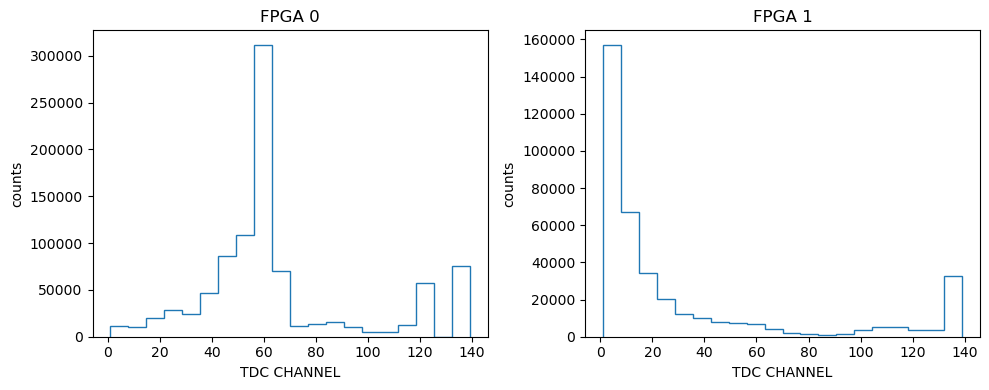

In [5]:
import pandas as pd
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
#6.1
df=pd.read_csv("dataex6.txt")#,nrows=N)
max_rows=len(df)
'''
print(max_rows)
N=30000
df.head(N)
'''
#6.2
x=df['BX_COUNTER'].max()+1
#6.4
#in ns
df['abs_time']=25.*x*df['ORBIT_CNT']+25.*df['BX_COUNTER']+25./30*df['TDC_MEAS']
df.sort_values(by='abs_time')
#6.3
print(f'Lasted time of measuraments is {df['abs_time'].max()-df['abs_time'].min()} ns')
#6.5
df['HEAD'] = npr.randint(0,2,size=max_rows)
#6.6
df_head_1 = df[ df['HEAD'] == 1 ]
df
#6.7
fig, ax = plt.subplots(1,2,figsize=(10,4))
for classe, data in df.groupby('FPGA'):
    classe=int(classe)
    ax[classe].hist( data['TDC_CHANNEL'], bins=20, histtype='step' )
    ax[classe].set_title("FPGA "+str(classe))
    ax[classe].set_ylabel('counts')
    ax[classe].set_xlabel('TDC CHANNEL')
plt.tight_layout()
#6.8
print('The most noisy channels are:')
noisy = df.groupby('TDC_CHANNEL').size().nlargest(3)
for tdc, counts in zip(noisy.index , noisy.values):
    print(f'Tdc channel number {tdc} with {counts} counts')
#6.9
a=df[df['TDC_CHANNEL']==139]
#print(f"The number of orbit in channel 139 with al least one measuraments are {a['ORBIT_CNT'].nunique()}")
orbit_count= a.groupby('ORBIT_CNT').size()
orbit_count_unique=orbit_count[orbit_count==1]
orbit_count_unique
print(f"The number of orbit in channel 139 with exactaly one measurament are {len(orbit_count_unique)}")
print(f"The number of orbit in channel 139 with al least one measuraments are {len(orbit_count)}")